In [1]:
import numpy as np
import os
import cv2


data_path=r'C:\Users\ASUS USER\Desktop\deep learning projects\Plant disease detection  Dataset'
categories=os.listdir(data_path)

labels=np.arange(len(categories))

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'Diseased': 0, 'Healthy': 1}
['Diseased', 'Healthy']
[0 1]


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_size = 224

data = []
target = []

# Initialize ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Counts of images
disease_count = 364
healthy_count = 46

for category in categories:
    folder_path = os.path.join(data_path, category)
    img_names = os.listdir(folder_path)
    
    for img_name in img_names:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        # cv2.imshow('LIVE', img)
        # cv2.waitKey(100)
        try:
            resized = cv2.resize(img, (img_size, img_size))
            if category == 'Healthy':
                # Add original healthy images
                data.append(resized)
                target.append(label_dict[category])
                
                # Number of augmentations needed
                num_augmentations = (disease_count // healthy_count) - 1
                
                # Apply augmentation for healthy images
                img_array = resized.reshape((1,) + resized.shape)
                aug_iter = datagen.flow(img_array)
                for _ in range(num_augmentations):
                    aug_img = next(aug_iter)[0].astype('uint8')
                    data.append(aug_img)
                    target.append(label_dict[category])
            else:
                data.append(resized)
                target.append(label_dict[category])
        except Exception as e:
            print(e)
            # If any exception is raised, the exception will be printed here and passed to the next image

# Augment additional healthy images to balance dataset
current_healthy_count = target.count(label_dict['Healthy'])
additional_augmentations_needed = disease_count - current_healthy_count
healthy_indices = [i for i, t in enumerate(target) if t == label_dict['Healthy']]

for _ in range(additional_augmentations_needed):
    index = np.random.choice(healthy_indices)
    img_array = data[index].reshape((1,) + data[index].shape)
    aug_iter = datagen.flow(img_array)
    aug_img = next(aug_iter)[0].astype('uint8')
    data.append(aug_img)
    target.append(label_dict['Healthy'])

cv2.destroyAllWindows()

In [3]:
import numpy as np

data=np.array(data)
target=np.array(target)

In [4]:
print(data.shape,target.shape)

(728, 224, 224, 3) (728,)


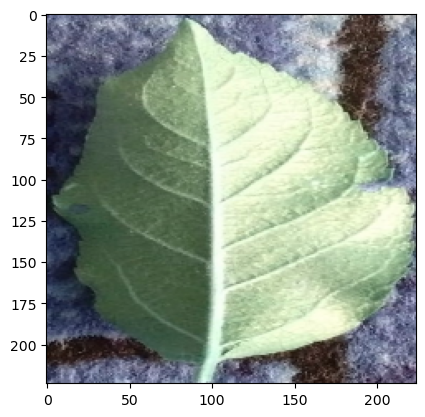

In [5]:
from matplotlib import pyplot as plt

plt.imshow(data[11])

In [6]:
target[11]

0

In [7]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Assuming data and target are defined and processed into data_new and target_new
data_new = np.array(data, dtype=np.float32) / 255.0  # Example processing step
target = np.array(target)
target_new = to_categorical(target)


In [8]:
np.save('data-mobile-net',data_new)
np.save('target-mobile-net',target_new)

saving data and target as numpy array files

In [9]:
target_new.shape

(728, 2)